In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
plt.rcParams['figure.figsize']=10,12
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('/content/Covid cases in India.xlsx')
df_india=df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,687351,0,622136,5780
1,2,Bihar,181471,0,167890,894
2,3,Chhattisgarh,43163,0,20487,356
3,4,Delhi,188193,0,163875,4538
4,5,Gujarat,102844,0,83419,3091
5,6,Haryana,74307,0,58615,781
6,7,Himachal Pradesh,7018,0,4941,53
7,8,Karnataka,592911,0,476378,8777
8,9,Kerala,187276,0,124688,719
9,10,Madhya Pradesh,71880,0,54649,1543


In [3]:
Indian_coord=pd.read_excel('/content/Indian Coordinates.xlsx')

In [4]:
df.drop(['S. No.'],axis=1,inplace=True)

In [5]:
df['Total cases'] = df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total no. of cases till sept 6', total_cases)

Total no. of cases till sept 6 5276348


In [6]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,687351,0,622136,5780,687351
1,Bihar,181471,0,167890,894,181471
2,Chhattisgarh,43163,0,20487,356,43163
3,Delhi,188193,0,163875,4538,188193
4,Gujarat,102844,0,83419,3091,102844
5,Haryana,74307,0,58615,781,74307
6,Himachal Pradesh,7018,0,4941,53,7018
7,Karnataka,592911,0,476378,8777,592911
8,Kerala,187276,0,124688,719,187276
9,Madhya Pradesh,71880,0,54649,1543,71880


In [7]:
df['Total Active'] = df['Total cases'] - (df['Death']+df['Cured'])
total_active=df['Total Active'].sum()
print('total no. of active cases across india:',total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

total no. of active cases across india: 837814


,Total Active
Name of State / UT,
Maharashtra,260363
Karnataka,107756
Kerala,61869
Andhra Pradesh,59435
Uttar Pradesh,52160
Tamil Nadu,46281
Odisha,29658
Telengana,29326
West Bengal,23390


In [8]:
df_full = pd.merge(Indian_coord,df,on='Name of State / UT')
map = folium.Map(location=[10, 90], zoom_start=4,tiles='Stamenterrain')
for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Active'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.0004, popup = ('<strong>State</strong>: ' + str(name).capitalize() +
'<strong>Total Active</strong>: ' + str(value) + ''),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



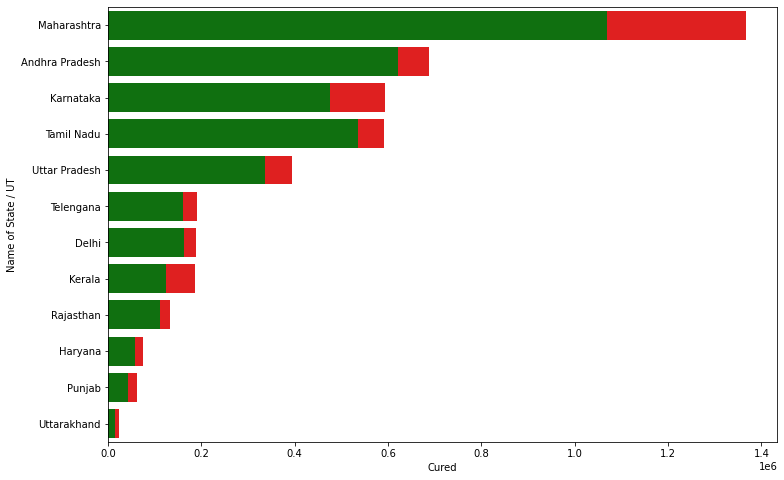

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="green")


In [10]:
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

<Figure size 432x288 with 0 Axes>

In [25]:
df_full = pd.merge(Indian_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')
for lat, lon, value,val1,val2,val3,name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Death'],df_full['Cured'],df_full['Total Active'],df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=val3*0.0004, popup = ('<strong>State</strong>: ' + str(name).capitalize() +' '+
'<strong>Total cases</strong>: ' + str(value) + ' ' + '<strong>Deaths</strong>: ' + str(val1) + ' '+'<strong>Cured</strong>: ' + str(val2) + ' '+'<strong>Total Active</strong>: ' + str(val3) + ''),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
map